In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('./diabetes_dataset.csv')

In [4]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
..           ...      ...            ...            ...      ...   ...                       ...  ...      ...
763           10      101             76             48      180  32.9                     0.171   63        0
764            2      122             70             27        0  36.8                     0.340   27        0
765            5      121             72             23      112  26.2                     0.245   30        0
766            1      126             60              0        0  30.1                     0.349   47        1
767            1       93             70             31        0  30.4                     0.315   23        0

[768 rows x 9 columns]

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [7]:
data.describe()

Pregnancies     Glucose  BloodPressure  ...  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000  ...                768.000000  768.000000  768.000000
mean      3.845052  120.894531      69.105469  ...                  0.471876   33.240885    0.348958
std       3.369578   31.972618      19.355807  ...                  0.331329   11.760232    0.476951
min       0.000000    0.000000       0.000000  ...                  0.078000   21.000000    0.000000
25%       1.000000   99.000000      62.000000  ...                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000  ...                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000  ...                  0.626250   41.000000    1.000000
max      17.000000  199.000000     122.000000  ...                  2.420000   81.000000    1.000000

[8 rows x 9 columns]

In [8]:
data.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [9]:
data.drop(columns=['BloodPressure','SkinThickness'],inplace=True)

In [10]:
data

Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148        0  33.6                     0.627   50        1
1              1       85        0  26.6                     0.351   31        0
2              8      183        0  23.3                     0.672   32        1
3              1       89       94  28.1                     0.167   21        0
4              0      137      168  43.1                     2.288   33        1
..           ...      ...      ...   ...                       ...  ...      ...
763           10      101      180  32.9                     0.171   63        0
764            2      122        0  36.8                     0.340   27        0
765            5      121      112  26.2                     0.245   30        0
766            1      126        0  30.1                     0.349   47        1
767            1       93        0  30.4                     0.315   23        0

[768 rows x 7 columns]

<Axes: >

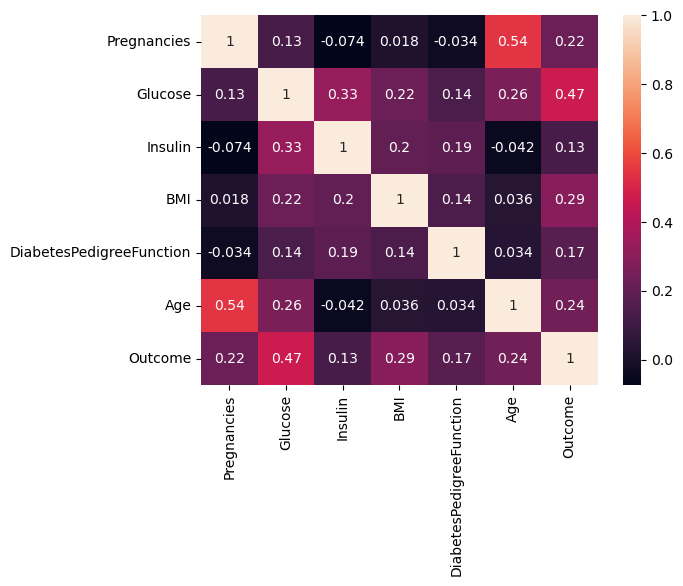

In [11]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

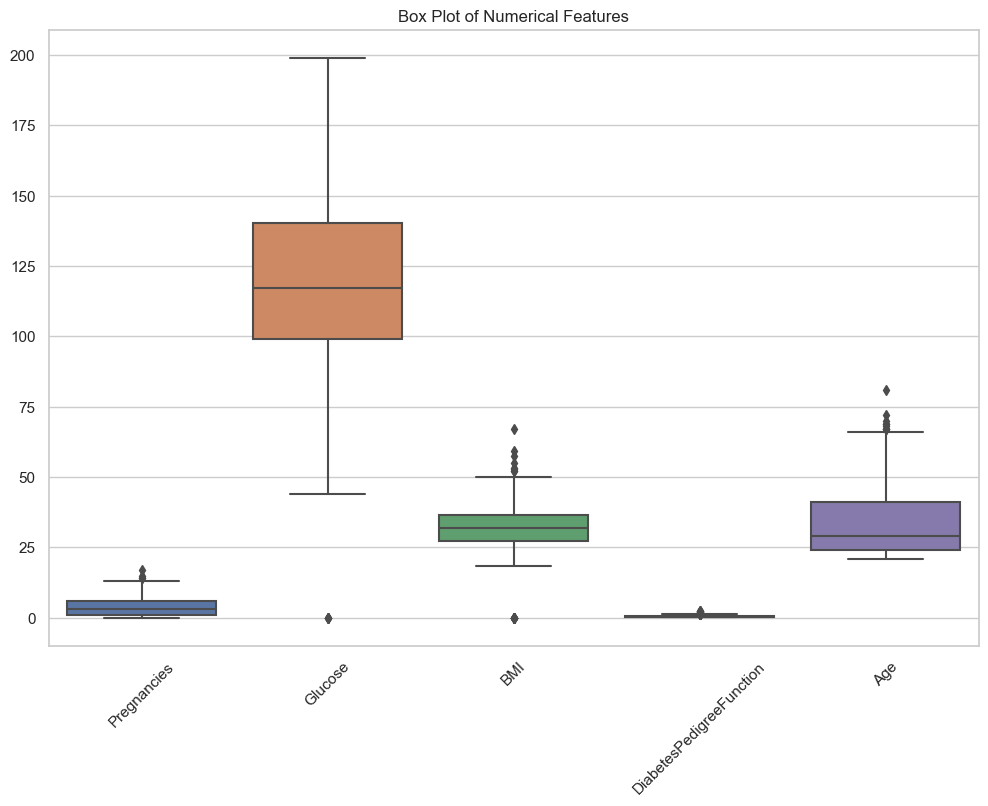

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for box plot
numerical_features = data[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8)) 
sns.boxplot(data=numerical_features) 

plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Features')
plt.show()


In [16]:
data.drop(columns='Insulin',inplace=True)

In [17]:
data

Pregnancies  Glucose   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148  33.6                     0.627   50        1
1              1       85  26.6                     0.351   31        0
2              8      183  23.3                     0.672   32        1
3              1       89  28.1                     0.167   21        0
4              0      137  43.1                     2.288   33        1
..           ...      ...   ...                       ...  ...      ...
763           10      101  32.9                     0.171   63        0
764            2      122  36.8                     0.340   27        0
765            5      121  26.2                     0.245   30        0
766            1      126  30.1                     0.349   47        1
767            1       93  30.4                     0.315   23        0

[768 rows x 6 columns]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns='Outcome'),data['Outcome'],random_state=42,test_size=0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [19]:
model=DecisionTreeClassifier()

In [41]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

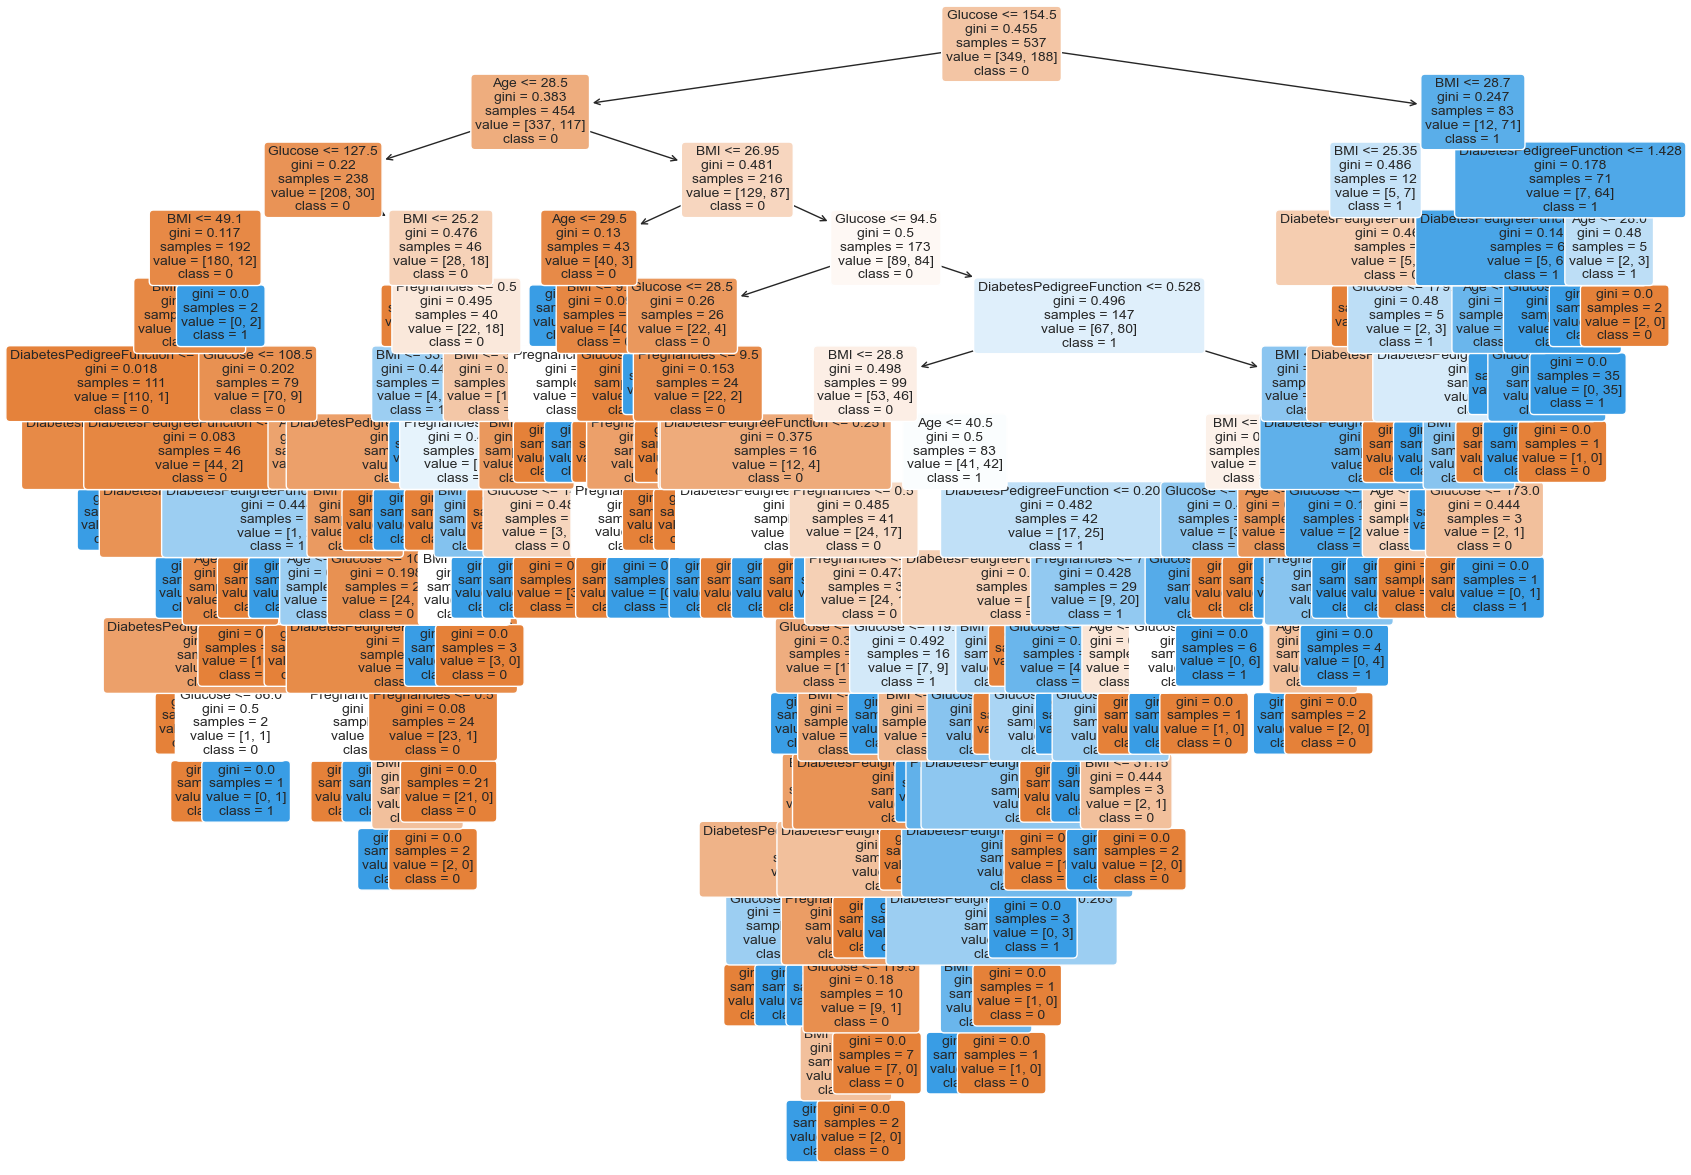

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


feature_names = data.columns.tolist()  

plt.figure(figsize=(20, 15))  # Increase the figure size (width, height)

plot_tree(model, filled=True, feature_names=feature_names, class_names=['0', '1'], rounded=True, fontsize=10)

# Save the plot as a PDF
plt.savefig("decision_tree_plot.pdf", format='pdf')  # Saves the plot in PDF format

# Display the plot
plt.show()


In [43]:
from sklearn.metrics import accuracy_score,r2_score

In [44]:
accuracy_score(y_test,model.predict(x_test))

0.7142857142857143

In [45]:
r2_score(y_test,model.predict(x_test))

-0.2620860927152322